In [1]:
import scipy as sp
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
locs = pd.read_json('./cleandata/locations.json')

In [4]:
locs

,loc_id,title,type,street1,city,zip,state,long,lat
0,0,FBWM - Warehouse,Warehouse,97 North Hatfield Rd,Hatfield,01038,MA,-72.614765,42.398013
1,1,Amherst Survival Center,Agency,138 Sunderland Road,Amherst,01002,MA,-72.532890,42.414720
2,2,"Palmer Food Share, Inc.",Agency,39 Walnut Street,Palmer,01069-1731,MA,-72.325910,42.158240
3,3,Franklin County Community Meals Program,Agency,118 East Main Street,Orange,01364,MA,-72.304770,42.590400
4,4,Freedom House of God,Agency,563 Union Street,Springfield,01139-0187,MA,-72.571030,42.107610
...,...,...,...,...,...,...,...,...,...
132,132,Riverland Farm,Pick-up,206 River Rd.,Sunderland,01375,MA,-72.584480,42.446040
133,133,Next Barn Over,Pick-up,15 Lawrence Plain Rd.,Hadley,01035,MA,-72.577480,42.329050
134,134,Warner Farm,Pick-up,23 South Main St.,Sunderland,01375,MA,-72.582070,42.461950
135,135,Kitchen Garden,Pick-up,131 South Silver Ln.,Sunderland,01375,MA,-72.564480,42.446000


In [5]:
locs = locs.loc[:124] # Get rid of pickup locations
locs

,loc_id,title,type,street1,city,zip,state,long,lat
0,0,FBWM - Warehouse,Warehouse,97 North Hatfield Rd,Hatfield,01038,MA,-72.614765,42.398013
1,1,Amherst Survival Center,Agency,138 Sunderland Road,Amherst,01002,MA,-72.532890,42.414720
2,2,"Palmer Food Share, Inc.",Agency,39 Walnut Street,Palmer,01069-1731,MA,-72.325910,42.158240
3,3,Franklin County Community Meals Program,Agency,118 East Main Street,Orange,01364,MA,-72.304770,42.590400
4,4,Freedom House of God,Agency,563 Union Street,Springfield,01139-0187,MA,-72.571030,42.107610
...,...,...,...,...,...,...,...,...,...
120,120,Urban League,Mobile Food Bank,33 Oak St.,Springfield,01109,MA,-72.573440,42.108240
121,121,Westfield Mobile Food Bank,Mobile Food Bank,60 Broad St.,Westfield,01085,MA,-72.748010,42.117380
122,122,Our Lady of the Valley,Mobile Food Bank,33 Adams St.,Easthampton,01027,MA,-72.664750,42.267910
123,123,Grenville Park,Mobile Food Bank,73 Church St.,Ware,01082,MA,-72.235330,42.264920


In [6]:
longs = locs['long'].to_numpy()
lats = locs['lat'].to_numpy()

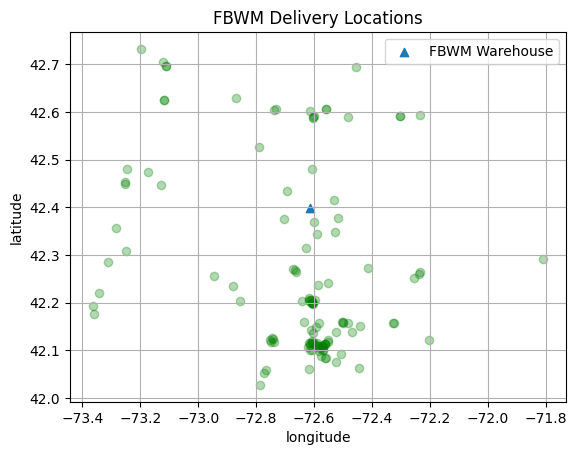

In [26]:
#Naive scatter plot of our delivery locations
plt.grid()
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
plt.scatter(longs[1:], lats[1:], alpha=0.3, color='green')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.title('FBWM Delivery Locations')
plt.legend()
plt.savefig('./all_data.png')

In [8]:
long_lat_in_one = np.array([*zip(longs[1:],lats[1:])]) #Compress into one array for clustering, except the warehouse
#long_lat_in_one = sp.cluster.vq.whiten(long_lat_in_one) # Remove noise from the data

In [9]:
from collections import defaultdict
def dict_with_list():
    return defaultdict(list)
k_to_dict_of_lists = defaultdict(dict_with_list)

for k in range(3,10,2):
    centroids, labels = sp.cluster.vq.kmeans2(long_lat_in_one, k = k)
    current_dict = k_to_dict_of_lists[k]
    for i,v in enumerate(labels):
        current_dict[v].append(i)

In [10]:
for K, Dict in k_to_dict_of_lists.items():
    new_one = defaultdict(list)
    for k,v in Dict.items():
        new_one[k].append(long_lat_in_one[v])
    k_to_dict_of_lists[K] = new_one

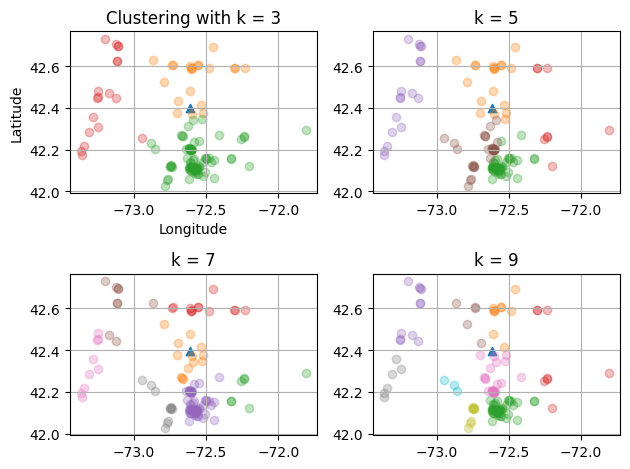

In [24]:
plt.subplot(221)
dikt = k_to_dict_of_lists[3]
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.grid()
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Clustering with k = 3')
    plt.scatter(arr1,arr2,alpha = 0.3)


plt.subplot(222)
dikt = k_to_dict_of_lists[5]
plt.grid()
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.title('k = 5')
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.scatter(arr1,arr2,alpha = 0.3)


plt.subplot(223)
dikt = k_to_dict_of_lists[7]
plt.grid()
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.title('k = 7')
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.scatter(arr1,arr2,alpha = 0.3)


plt.subplot(224)
dikt = k_to_dict_of_lists[9]
plt.grid()
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.title('k = 9')
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.scatter(arr1,arr2,alpha = 0.3)

plt.tight_layout()
plt.savefig('./multiple_k.png',)

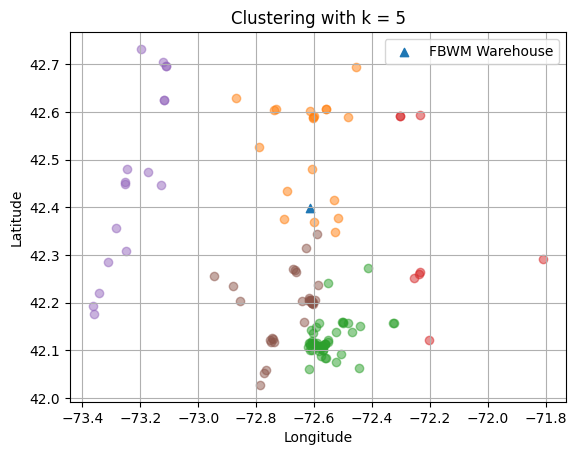

In [12]:
dikt = k_to_dict_of_lists[5]
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering with k = 5')
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.scatter(arr1,arr2,alpha = 0.5)
plt.legend()

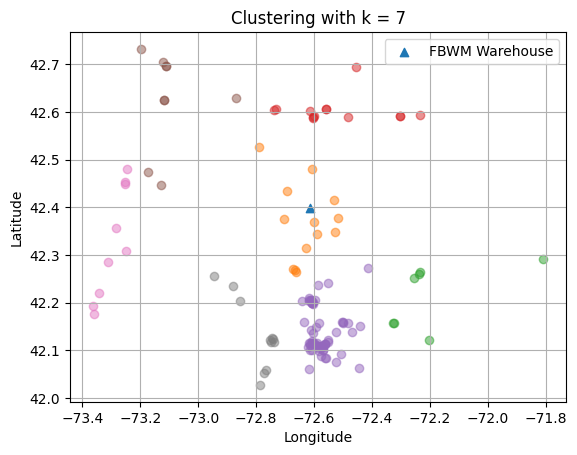

In [13]:
dikt = k_to_dict_of_lists[7]
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering with k = 7')
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.scatter(arr1,arr2,alpha = 0.5)
plt.legend()

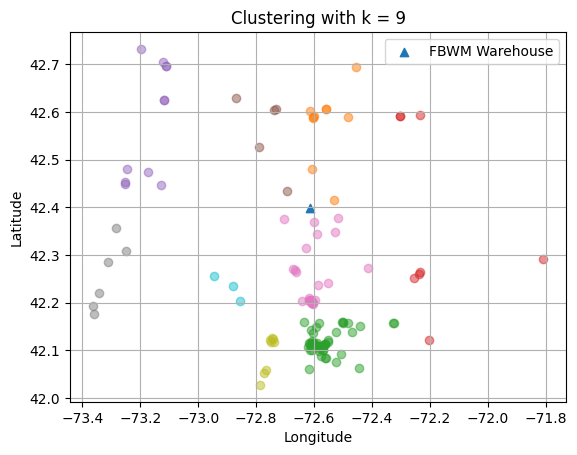

In [14]:
dikt = k_to_dict_of_lists[9]
plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clustering with k = 9')
plt.scatter(longs[0], lats[0], label='FBWM Warehouse', marker='^')
for spots in dikt.values():
    arr = np.array(spots)[0]
    arr1 = arr[:,0]
    arr2 = arr[:,1]
    plt.scatter(arr1,arr2,alpha = 0.5)
plt.legend()

#3 - We see that groups are too large - not great for our programe because this may not be much better in terms of complexity, but it will be closer to global optimality.

#5  - A cluster (is that brown?) is too small - only 3 data points, doesn't make a lot of sense to use this.

#7  - Seems best to me, decently sized clusters, and also have a even enough distribution of distances we see.

#9 - Again, we see a problem with the light blue cluster having only three points.

IMO, we should have a comparison between k = 3, k = 7,. There's no harm in trying to run our program on all of these clusterings, it won't take a lot of time, but the results won't be very different.